# Efficient-CapsNet Model Train

In this notebook we provide a simple interface to train Efficient-CapsNet on the three dataset discussed in "Efficient-CapsNet: Capsule Network with Self-Attention Routing":

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

The hyperparameters have been only slightly investigated. So, there's a lot of room for improvements. Good luck!

**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages, plotHistory
from models import EfficientCapsNet
import cv2

In [3]:
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

In [4]:
# some parameters
dataset_name = 'KMNIST'
model_name = 'MNIST'

# 1.0 Import the Dataset

In [5]:
dataset = Dataset('KMNIST', config_path='config.json')

|          | 0/? [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 28, 28, 1) (10000, 28, 28, 1)
[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

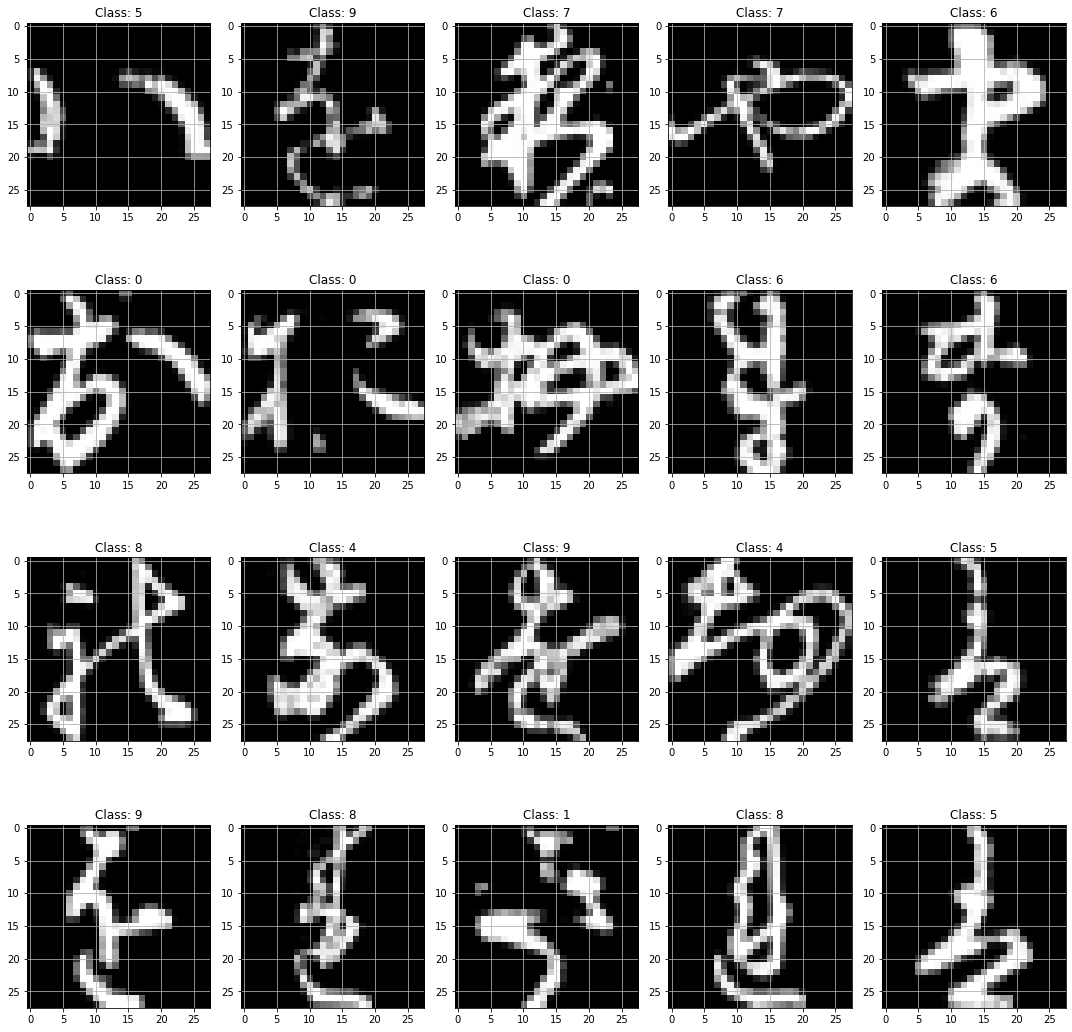

In [6]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [7]:
model_train = EfficientCapsNet(model_name, mode='train', verbose=True)

Model: "Efficient_CapsNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 64)  

# 3.0 Train the Model

In [8]:
dataset_train, dataset_val = dataset.get_tf_data() 

In [9]:
dataset_train, dataset_val

(<PrefetchDataset shapes: (((None, 28, 28, 1), (None, 10)), ((None, 10), (None, 28, 28, 1))), types: ((tf.float32, tf.float32), (tf.float32, tf.float32))>,
 <PrefetchDataset shapes: (((None, 28, 28, 1), (None, 10)), ((None, 10), (None, 28, 28, 1))), types: ((tf.float32, tf.float32), (tf.float32, tf.float32))>)

In [12]:
history = model_train.train(dataset, initial_epoch=0)

------------------------------MNIST train------------------------------


Epoch 1/150


UnimplementedError:  Fused conv implementation does not support grouped convolutions for now.
	 [[node Efficinet_CapsNet_Generator/Efficient_CapsNet/primary_caps/conv2d/BiasAdd (defined at /Users/leopoldmaillard/Desktop/ML/Efficient-CapsNet/utils/layers.py:129) ]] [Op:__inference_train_function_147313]

Function call stack:
train_function


In [ ]:
plotHistory(history)